# The quantum teleportation algorithm

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

## Problem description

Quantum teleportation is a technique for moving quantum states around, even in the absence of a quantum communication channels linking the sender of the quantum state to the recipient. Here is how it works. Alice has a qubit $\ket{\psi}$ that she has to deliver to Bob. She doesn't know the state of the qubit and can only send *__classical__* information to Bob. How she can do it? 

It seems like "mission imposible", but Alice and Bob are an old freinds, each having one qubit from an EPR pair (entangled qubits) created a long time ago when they separated. So they know solution: Alice interacts the qubit $\ket{\psi}$ with her half of the EPR pair, and then measures the two qubits in her posession, obtaining one of the possible classical results, 00, 01, 10, and 11. She sends this information to Bob. Depending on Alice's classical message, Bob performs of of four operations on his half of the EPR pair. By doing this he can recover the original state $\ket{\psi}$.

## A little bit of theory

Why can't we “look at” the information (i.e., read it by some means) stored in the qubit $\ket{\psi}$ and then send a message to Bob containing that information? It’s because when we make a measurement, we disturb the state of the system according to the following measurement postulate of quantum mechanics. __Quantum measurements__ are described by a collection ${M_m}$ of *measurement operators* that act on the space of the quantum system being measured and satisfy the *completeness equation* $$\sum_m M_m^{\dagger} M_m = I$$
The index *m* refers to all measurement outcomes that may occur. If the state of the system is $\ket{\psi}$ immediately before the measurement, then the probability that result *m* occurs is given by $$p(m) = \bra{\psi}M_m^{\dagger}M_m\ket{\psi}.$$
The state of the system immediately after the measurement is given by $$\frac{M_m\ket{\psi}}{\sqrt{p(m)}}.$$
For our particular example of quantum teleportation, the last equation is the most relevant. This feature says that the state of Alice’s qubit would change if she measured it. Thus, in the quantum case, she cannot simply read the information in the qubit and send that to Bob.

For qubits, a set of measurement operators are $M_0 = \ket{0}\bra{0}$ and $M_1 = \ket{1}\bra{1}$. These measurement operators are Hermitian and satisfy the *completeness relation* $M_0^{\dagger}M_0 + M_1^{\dagger}M_1 = I$.

So Alice cannot measure her qubit and send that information to Bob without disturbing the state. Perhaps she can simply copy the state $\ket{\psi}$ onto another qubit she has, say $\ket{\varphi}$, and send this qubit to Bob? It turns out that in general this is not possible in quantum mechanics, as described by the *__no-cloning theorem__*.

__Entanglement is Quantum correlation__

___
*Quick reminder about multi-qubit states (more details in QuIC Intro):*

Assume we have two qubits in our quantum system $\ket{\psi} = a \ket{0} + b \ket{1}$ and $\ket{\varphi} = c \ket{0} + d \ket{1}$. The total state of the quantum system is given as the __tensor product__ of these two states:

$$\ket{\psi} \otimes \ket{\varphi} = ac\ket{0} \otimes \ket{0} + bc\ket{1} \otimes \ket{0} + ad \ket{0} \otimes \ket{1} + bd \ket{1} \otimes \ket{1} \\ = ac \ket{00} + bc \ket{10} + ad \ket{01} + bd \ket{11} = \begin{pmatrix} ac \\ bc \\ ad \\ bd \end{pmatrix}$$
___

An __*entangled state*__ is any state that cannot be written as a separable state. Suppose Alice and Bob have qubits in Hilbert spaces and suppose that the composite state of their qubits is $(\ket{00} + \ket{11})/\sqrt{2}$. In this case you cannot describe either of their qubits individually. The state of the entire composite system is specified, but neither component state can be determined. Alice’s and Bob’s qubits are *__entangled__*.

Entanglement is quantum correlation, that is, correlation between two quantum states. Consider the state $\ket{\Phi} = (\ket{00} + \ket{11})/\sqrt{2}$, commonly known as a Bell state or EPR pair. Suppose we measure the first qubit and obtain the zero outcome. What is the state immediately after measurement? We use $M_0 = \ket{0} \bra{0}$ as a measurement on the first qubit only and do nothing (or act with the identity operator) on the second qubit. Then, the state immediately after the measurement is $$\frac{M_0 \ket{\Phi}}{\sqrt{p(0)}} = (\ket{0} \bra{0} \otimes I)(\ket{0} \ket{0} + \ket{1} \ket{1}) = \ket{0} \ket{0}.$$
If we measure the first qubit (Alice’s qubit) to be in the zero state, then immediately after the measurement the second qubit (Bob’s qubit) will also be in the zero state! The qubits are somehow *correlated* in a quantum sense that we call *__entanglement__*. If Bob measured his qubit after, he would always obtain 0 with 100% probability. Alice’s and Bob’s measurement statistics would be perfectly correlated.
Here’s the interesting thing: Alice’s measurement was local. It only acts on her qubit, she only touches her qubit, she never looks at Bob’s qubit. However, despite this, the measurement somehow *non-locally* affects Bob’s qubit. This is a demonstration of *non-locality* in quantum mechanics, which means that local actions can influence objects far away. (Imagine if Alice and Bob created an entangle pair of qubits then ran off to opposite sides of the world.)
___
*Quick reminder about multi-qubit gates (more details in QuIC Intro)*

An example of a two qubit operator that we'll be using all the time is the CNOT, or controlled-NOT, gate. This operation can be summed up as "if the first qubit is in $\ket{1}$, flip the second qubit, otherwise do nothing. In the computational basis ${\ket{00},\ket{01},\ket{10},\ket{11}}$ a matrix representation for CNOT is $$\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}.$$
___

## How Quantum teleportation algorithm works 

The circuit for the teleportation algorithm is shown below. 
<img src="teleport.png" align="middle">

The state to be teleported is $\ket{\psi} = \alpha \ket{0} + \beta \ket{1}$, where $\alpha$ and $\beta$ are unknown amplitudes. The state input into the circuit $\ket{\psi_0}$ is

$$\ket{\psi_0} = \ket{\psi}\otimes\beta_{00} = \\ = \frac{1}{\sqrt{2}} \Big [ \alpha \ket{0} \otimes \Big (\ket{00} + \ket{11} \Big) + \beta \ket{1} \otimes \Big(\ket{00} + \ket{11}\Big) \Big ],$$
where the first two qubits (on the left) belong to Alice, and the third qubit to Bob. Alice's second qubit and Bob's qubit start out in an EPR state. Alice sends her qubit through a CNOT gate, obtaining

$$\ket{\psi_1} = \frac{1}{\sqrt{2}} \Big [ \alpha \ket{0} \otimes \Big (\ket{00} + \ket{11} \Big) + \beta \ket{1} \otimes \Big(\ket{10} + \ket{01}\Big) \Big ].$$

She then sends the first qubit through a Hadamar gate, obtaining

$$\ket{\psi_2} = \frac{1}{2} \Big [ \alpha \Big( \ket{0} + \ket{1} \Big) \otimes \Big (\ket{00} + \ket{11} \Big) + \beta \Big( \ket{0} - \ket{1} \Big) \otimes \Big(\ket{10} + \ket{01}\Big) \Big ].$$

This state may be re-written in the following way, simply by regrouping terms

$$\ket{\psi_2} = \frac{1}{2} \Big [ \ket{00} \otimes \Big( \alpha\ket{0} + \beta\ket{1} \Big) \\ + \ket{01} \otimes \Big( \alpha\ket{1} + \beta\ket{0} \Big) \\ + \ket{10} \otimes \Big( \alpha\ket{0} - \beta\ket{1} \Big) \\ + \ket{11} \otimes \Big( \alpha\ket{1} - \beta\ket{0} \Big) \Big ].$$

The first term has Alice's qubits in the state $\ket{00}$, and Bob's qubit in the state $\alpha \ket{0} + \beta\ket{1}$ - which is the original state $\ket{\psi}$ If Alice performs a measurement and obtains the result 00 the Bob's system will be in the state $\ket{\psi}$. Depending on Alice's measurement outcome, Bob's qubit will end up in one of the four possible states. Of course, to know which state it is in, bob must be told the result of Alice's measurement (this in fact prevents teleportation being used to transmit informationfaster than light!). Once Bob has learned the measurement outcome, Bob can "repair" his state, recovering $\ket{\psi}$, by applying the appropriate quantum gate. For example, in the case where measurement yelds 00, Bob doesn't need to do anything. If the measurement is 10 the Bob can fix up his state by applying the $Z$ gate. If the measurement is 11 then Bob can fix up his state by applying first an $X$ and then $Z$ gate. Summing up, Bob needs to apply the transformation $Z^{M_1}X^{M_2}$ to his qubit, and he will recover state $\ket{\psi}$

## Creating an EPR pair

Here how we can create an EPR pair. 

<img src="eprpair.png" align="middle">

We start out with two qubits in the $\ket{0} \otimes \ket{0}$ state. We then perform a Hadamard gate on the first qubit and do nothing on the second qubit. Thus, the overall multi-qubit gate that we perform is $H \otimes I$. The action of this gate on the $\ket{0} \otimes \ket{0}$ state is
$$(H \otimes I) \ket{0} \otimes \ket{0} = H\ket{0} \otimes I\ket{0} = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1}) \otimes \ket{0} = \frac{1}{\sqrt{2}}(\ket{00} + \ket{10})$$

To make it exactly an EPR pair, we can perform a CNOT, controlling on the first qubit. Doing so yields
$$\text{CNOT}_{0,1} \frac{1}{\sqrt{2}} (\ket{00} + \ket{10}) = \frac{1}{\sqrt{2}} \Big( \text{CNOT}_{0,1} \ket{00} + \text{CNOT}_{0,1} \ket{10} \Big ) = \frac{1}{\sqrt{2}} (\ket{00} + \ket{11})$$

Now we know how to create an EPR pair!

## It's time to create a teleportation algorithm 

Here are steps we need to perform.

Step 1: Alice and Bob create an entangled Bell pair. Each one of them holds onto one of the two qubits in the Bell pair. In order to do this we need to transfer one of the qubits to the Bell basis by using a Hadamard gate, and then to apply a CNOT gate onto the other qubit controlled by the one in the Bell basis. Let's say Alice owns $q_1$ and Bob owns $q_2$ after they part ways.

Step 2: Alice applies a CNOT gate on $q_1$, controlled by $\ket{\psi}$.

Step 3: Next, Alice applies a Hadamard gate to $\ket{\psi}$, and applies a measurement to both qubits that she owns.

Step 4: Then, she tells Bob the outcome of her two-qubit measurement. Depending on what she says, Bob does this to his qubit, $q_2$:

00 → Do nothing

01 → Apply X gate

10 → Apply Z gate

11 → Apply ZX gate

Note that this transfer of information is classical. At the end of this protocol, Alice's qubit has now teleported to Bob.

__How will we test this result on a real quantum computer?__

In this notebook, we will give Alice a secret state $\ket{\psi}$. This state will be generated by applying a series of unitary gates on a qubit that is initialized to the ground state, $\ket{\psi}$. You can create any secret unitary gate that will be applied to $\ket{0}$ before passing on the qubit to Alice:

*for example:* <code>secret_unitary = 'hz'</code> means applying Hadamar and then Z gate

If the quantum teleportation circuit works, then at the output of the protocol discussed above will be the same state passed on to Alice. Then, we can undo the applied secret_unitary (by applying its conjugate transpose), to yield the $\ket{0}$ that we started with. We will then do repeated measurements of Bob's qubit to see how many times it gives 0 and how many times it gives 1.

What do we expect?

In the ideal case, and assuming our teleportation protocol works, we will always measure 0 from Bob's qubit because we started off with $\ket{0}$.

In [1]:
"""Imports."""
import warnings

import qiskit
from qiskit import (Aer, execute, ClassicalRegister, QuantumRegister, QuantumCircuit)
from qiskit.tools.visualization import plot_histogram

In [2]:
if "0.9.0" not in qiskit.__version__:
    warnings.warn("This notebook is written for Qiskit v0.9.0." + 
                 "Your code may not execute properly.")

In [3]:
"""Simple function that applies a series of unitary gates from a given string."""
def apply_secret_unitary(secret_unitary, qubit, quantum_circuit, dagger):
    functionmap = {
                    'x':quantum_circuit.x,
                    'y':quantum_circuit.y,
                    'z':quantum_circuit.z,
                    'h':quantum_circuit.h,                    
                    't':quantum_circuit.t,                    
    }
    if dagger: functionmap['t'] = quantum_circuit.tdg

    if dagger:
        [functionmap[unitary](qubit) for unitary in secret_unitary]
    else:
        [functionmap[unitary](qubit) for unitary in secret_unitary[::-1]]

In [4]:
"""Create the quantum circuit."""
# Create a three qubit circuit
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)

''' Qubit ordering as follows (classical registers will just contain measured values of the corresponding qubits):
q[0]: qubit to be teleported (Alice's first qubit. It was given to her after the application of a secret unitary 
      which she doesn't know)
q[1]: Alice's second qubit
q[2]: Bob's qubit, which will be the destination for the teleportation
'''

secret_unitary = 'hx'
# Apply the secret unitary that we are using to generate the state to teleport. You can change it to any unitary
apply_secret_unitary(secret_unitary, q[0], qc, dagger = 0)
qc.barrier()

# Next, generate the entangled pair between Alice and Bob (Remember: Hadamard followed by CX (==CNOT) generates a Bell pair)
qc.h(q[1])
qc.cx(q[1], q[2])
qc.barrier()

# Next, apply the teleportation protocol. 
qc.cx(q[0], q[1])
qc.h(q[0])
qc.barrier()

# Next, we measure two qubits, which belongs to Alice
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])

# After measurements Bob's qubit collapses to four possible state, and depending on the Alice's qubit measurements 
# we apply first X^{M1} (which is equivalent to CNOT_{1,2}) and after Z^{M0} (which is equivalent to CZ_{0,2}) 
qc.cx(q[1], q[2])
qc.cz(q[0], q[2])
qc.barrier()

'''
In principle, if the teleportation protocol worked, we have q[2] = secret_unitary|0>
As a result, we should be able to recover q[2] = |0> by applying the reverse of secret_unitary
since for a unitary u, u^dagger u = I.
'''
apply_secret_unitary(secret_unitary, q[2], qc, dagger=1)
qc.measure(q[2], c[2])

# Draw the circuit
qc.draw()

{'001': 1256, '011': 1264, '000': 1224, '010': 1280}


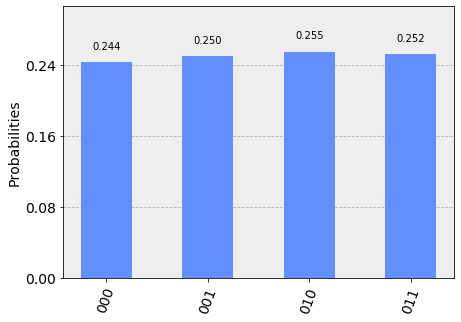

In [5]:
"""Run the circuit."""
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=5024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

Note that the results on the x-axis in the histogram above are ordered as $c_2c_1c_0$. We can see that only results where $c_2=0$ appear, indicating that the teleporation protocol has worked.

Since our circuit is also small enough to simulate classically, we can use the ```statevector_simulator``` backend to directily visualize the quantum statevector being teleported from qubit 0 to qubit 2. As an exercise to yourself, set up a single qubit quantum circuit that produces the superposition state to be teleported, and plot it on the Bloch sphere.

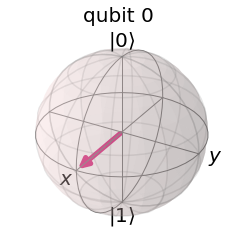

In [6]:
"""Exercise."""
# Create the quantum circuit (you don't need a classical register for this one)
qreg = QuantumRegister(1)
circuit = QuantumCircuit(qreg)

# Apply the secret unitary that we are using to generate the state to teleport.
circuit.h(qreg[0])

# Use the statevector_simulator backend + plot_bloch_multivector tool to visualize the state to be teleported
backend = Aer.get_backend('statevector_simulator') 
result = execute(circuit, backend).result() 
psi  = result.get_statevector(circuit)

# Visualize
qiskit.visualization.plot_bloch_multivector(psi)

We can now use the ```plot_bloch_multivector``` tool to visualize the output of the quantum teleportation circuit above and verify that our state was faithfully teleported from qubit 0 to qubit 2. Note that for this to work, you have to comment out several lines of code in the teleportation circuit. Which ones, and why?

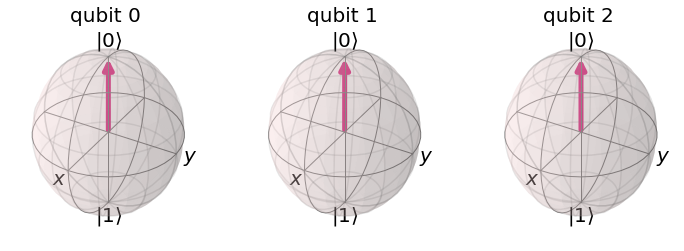

In [7]:
backend = Aer.get_backend('statevector_simulator') 
result = execute(qc, backend).result()
psi  = result.get_statevector(qc)

from qiskit.visualization import plot_bloch_multivector
#single_qubit_demo.draw()
plot_bloch_multivector(psi)

## Exercise: Run on a real backend

In the cell below, modify the code above to execute the quantum teleportation algorithm on a real backend. You need to register for an API key to use real backends if you haven't done so already. See the [Qiskit documentation](https://qiskit.org/) for instructions.

In [9]:
"""Execute on a real backend."""

'Execute on a real backend.'